In [1]:
%config InlineBackend.figure_format = 'retina'

def plt_arr(y, x, axis, title, label, log_scale=True, xlabel = None,  ylabel=None, bottom=None, top=None):
    axis.set_title(title)
    
    if xlabel:
        axis.set_xlabel(xlabel)
    if ylabel:
        axis.set_ylabel(ylabel)

    if bottom:
        axis.set_ylim(bottom=bottom)
    
    if top:
        axis.set_ylim(top=top)

    if log_scale:
        axis.set_yscale('log', base=10)
    
    axis.grid('on')
    axis.title.set_weight('bold')
    
    xlab = axis.xaxis.get_label()
    ylab = axis.yaxis.get_label()

    xlab.set_style('italic')
    xlab.set_size(15)
    ylab.set_style('italic')
    ylab.set_size(15)

    axis.plot(x, y, label = label)
    axis.scatter(x, y, c='purple', marker='D', s=1)

    axis.legend()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.preparator import Preparator
from src.evaluator import Evaluator
from src.strategies.advanced import AdvancedStrategy
from src.strategies.medium import MediumStrategy
from src.strategies.baseline import BaselineStrategy

DATA_PATH = '../data/raw.chartblock.json'
START_BALANCE = 1

preparator = Preparator(DATA_PATH)
bids, asks, generator = preparator.get_data()
evaluator = Evaluator(bids, asks, generator)
strategy = AdvancedStrategy()
profit = evaluator.calculate_profit(strategy, START_BALANCE)
print(profit)

0.5831999999999982


In [3]:
def build(left, right, transactions, axis):
    buys = []
    for i in (transactions[:, 0]):
        if (left < i and i < right):
            buys.append(i)
            
    sells = []
    for i in (transactions[:, 1]):
        if (left < i and i < right):
            sells.append(i)
    
    plt_arr(bids[left:right], np.arange(left, right), axis, 'buys/sells', 'bid', xlabel='timestamp', ylabel='cost')
    plt_arr(asks[left:right], np.arange(left, right), axis, 'buys/sells', 'ask')
    
    axis.scatter(buys, asks[buys], marker='^', color='g', s=130)
    axis.scatter(sells, bids[sells], marker='v', color='r', s=130)

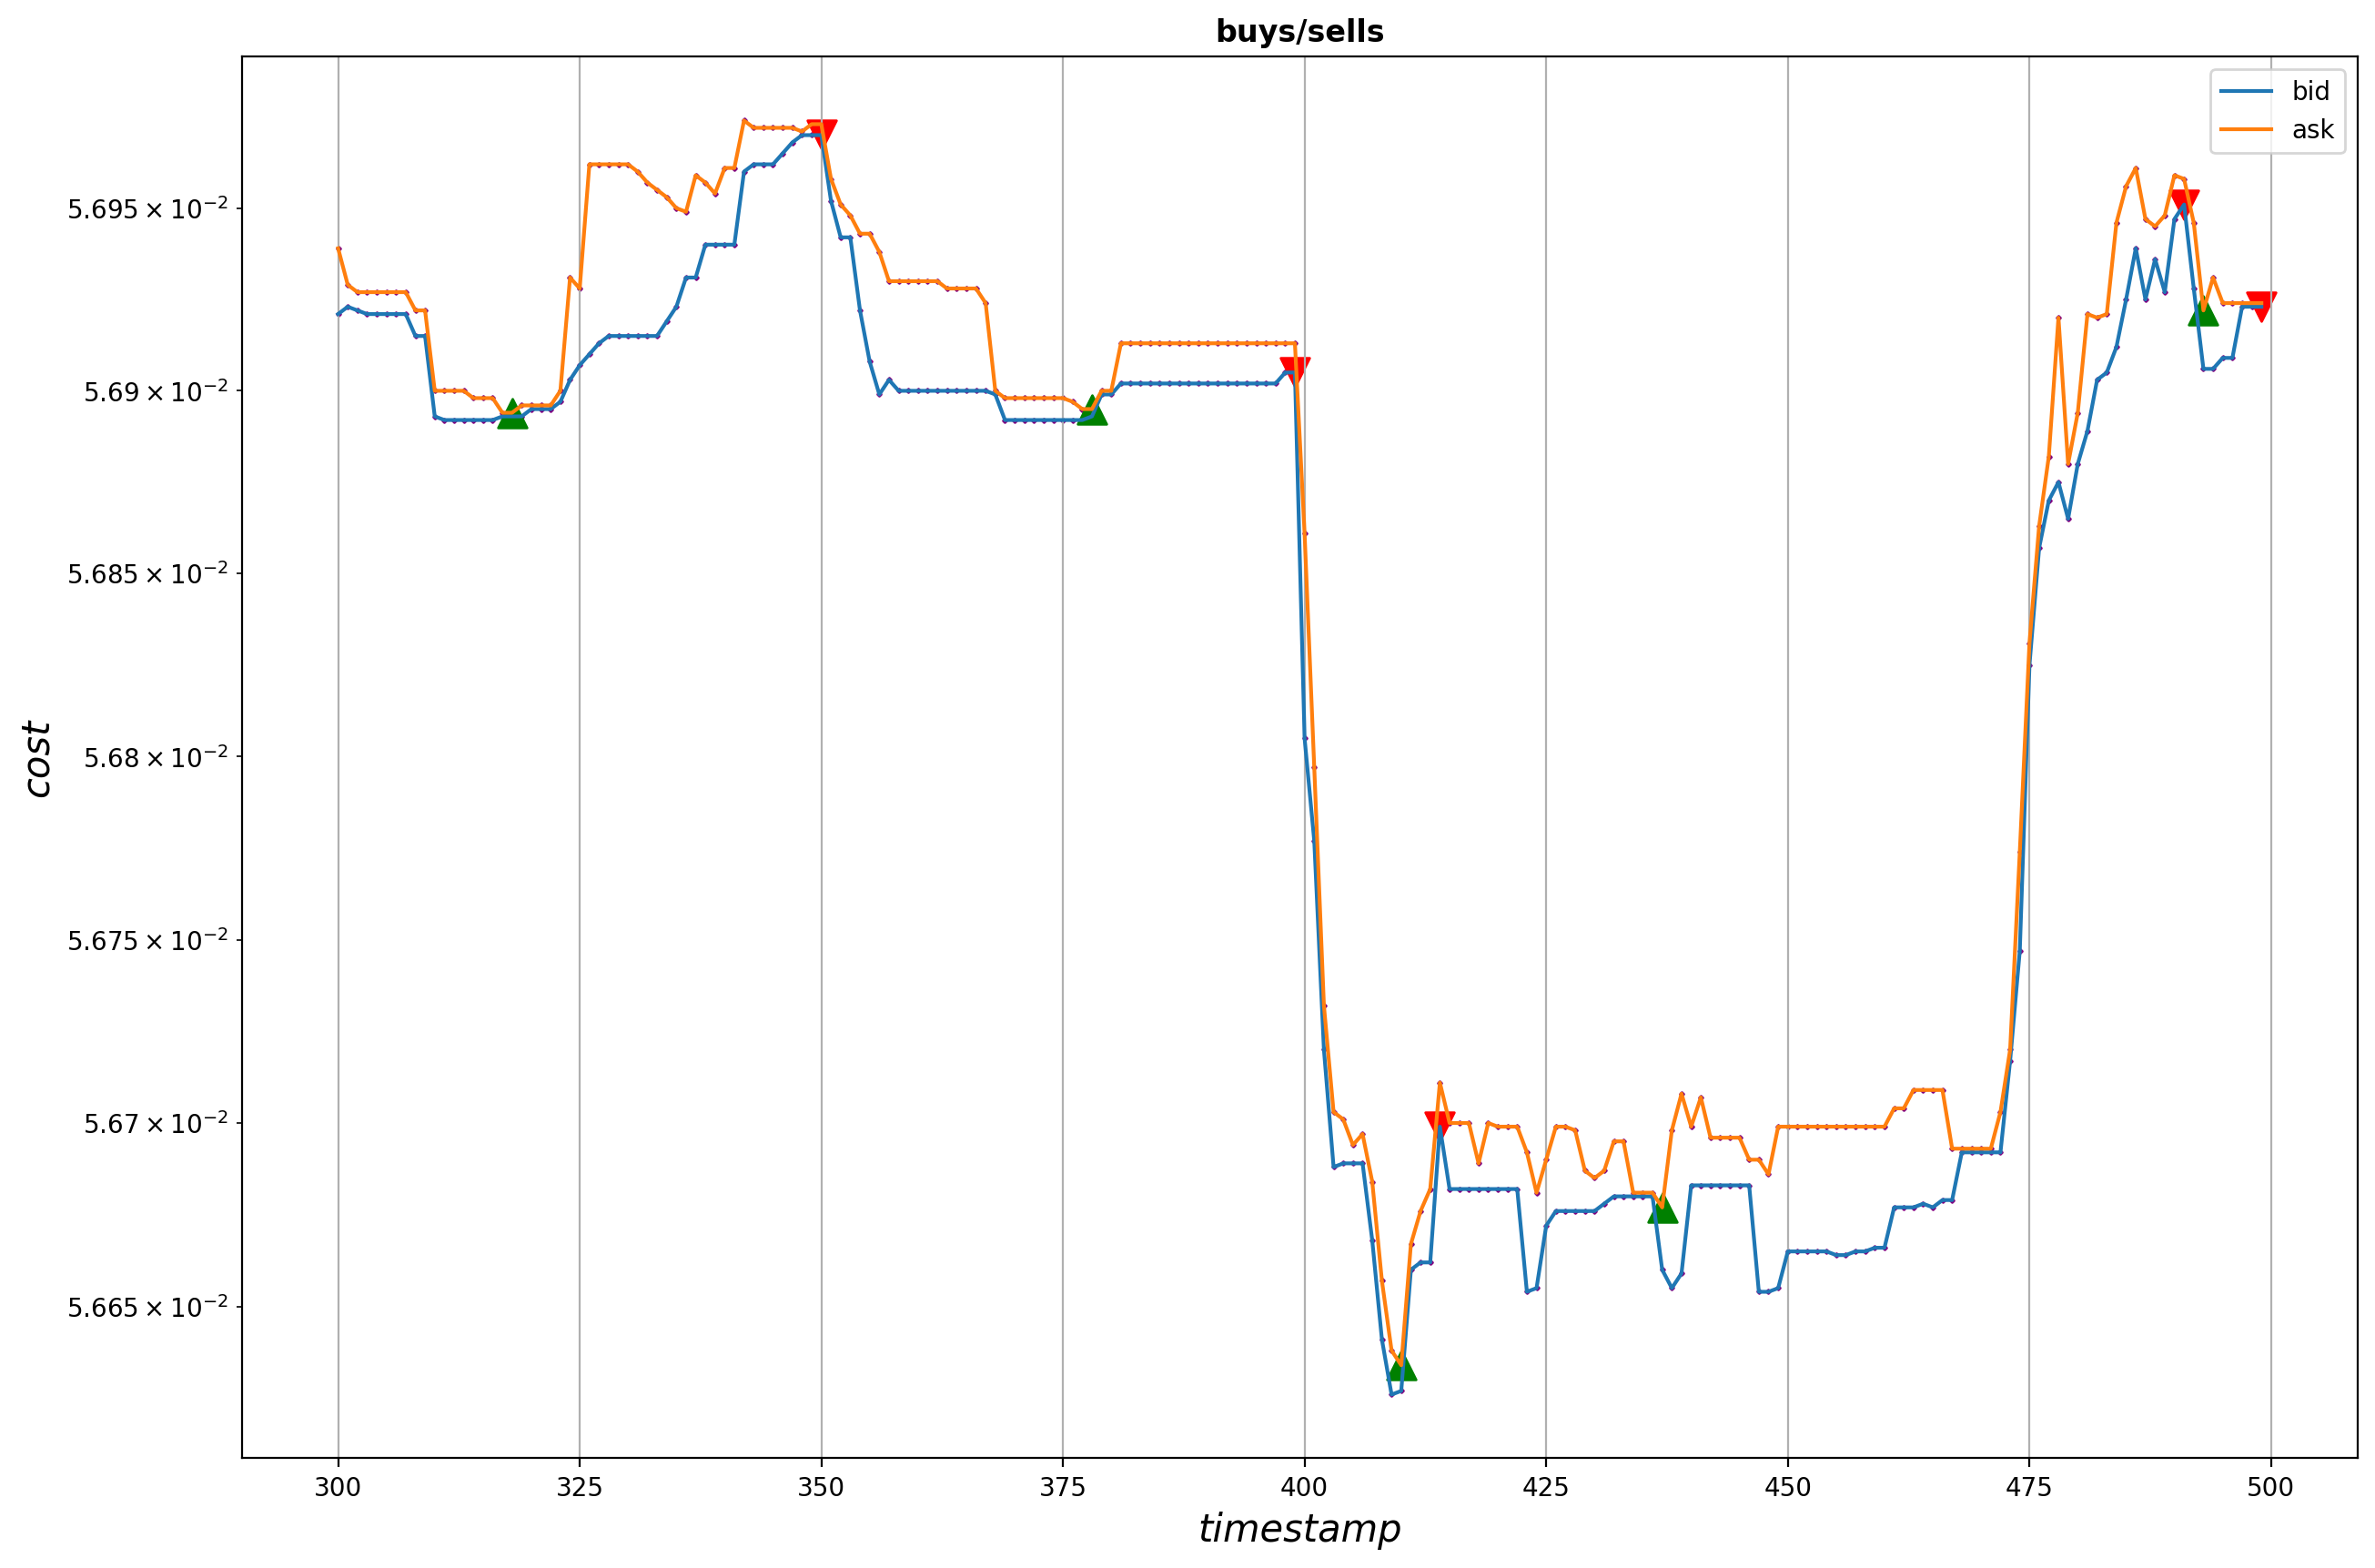

In [4]:
bids, asks, generator = preparator.get_data()

final_balance, transactions = strategy.trade(generator, len(bids), START_BALANCE)

fig, axis = plt.subplots(figsize=(15, 10))
build(300, 500, transactions, axis) 